* O objetivo desse notebook é fazer um forecasting com os dados acumulados e depois revertes esses dados para o normal. Não acho que essa técnica vale a pena.

In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [2]:
frequent_products = pd.read_csv("frequent.csv", index_col=0)

In [3]:
frequent_products.head()

,ENTREGA,GE2 CELULAR,GE1 ELETROPORTATEIS,GE1 CELULAR,CHIP VIVO 4G 128K P19 HRS PRE,GE1 TV LCD LED,CHIP CLARO ODA 128KB TRIPE,GE1 MOVEIS 1,GE2 REFRIGERADOR,CHIP TIM INFINITY PRE HRD TRIPLO 4G,...,CHIP OI 4G HLR 39,GE2 LAV. ROUPAS AUTOMATICA,SUPORTE TV UNIVERSAL LCD/LED 10 A 71 SBRUB750,VENTILADOR 40CM V-49 6P RED PREMIUM,TABLET NB184 M7S QUAD CORE PRETO,GE1 FOGAO 2 A 6 BOCAS,FOGAO 4BC. BALI 4076 BR,VENTILADOR 30CM NV-15 6P BR 220V,CELULAR RIU-I R200 DB PRETO-VERMELHO,CELULAR RIU-I R200 DB PRETO-AMARELO
2015-01-02,22.0,11.0,11.0,22.0,17.0,4.0,0.0,2.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-03,31.0,12.0,24.0,26.0,20.0,4.0,0.0,4.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-05,41.0,8.0,26.0,28.0,19.0,4.0,0.0,8.0,20.0,0.0,...,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2015-01-06,44.0,10.0,22.0,23.0,20.0,4.0,0.0,4.0,7.0,0.0,...,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
2015-01-07,55.0,9.0,21.0,38.0,22.0,5.0,0.0,7.0,8.0,0.0,...,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [4]:
ferro = frequent_products["FERRO SECO METALICO VFA 1110X BLACK E DECKER"]
ventilador = frequent_products["VENTILADOR VF40 SILENCE FORCE CD RE"]

In [5]:
ferro

2015-01-02    0.0
2015-01-03    1.0
2015-01-05    2.0
2015-01-06    2.0
2015-01-07    0.0
             ... 
2019-06-19    0.0
2019-06-20    1.0
2019-06-21    4.0
2019-06-22    1.0
2019-06-25    0.0
Name: FERRO SECO METALICO VFA 1110X BLACK E DECKER, Length: 1404, dtype: float64

In [6]:
cum_ferro = ferro.cumsum()

In [7]:
cum_ventilador = ventilador.cumsum()

In [8]:
def reverse_cumsum(series, initial = 0):
    series = series - series.shift(1).replace(np.nan, 0)
    series[0] -= initial
    return series

## Testando com Ventilador

### Naive Approach

In [9]:
import baseline_tools
from tensorflow.keras.metrics import mean_absolute_error, mean_squared_error

In [10]:
cum_ventilador.index = pd.to_datetime(cum_ventilador.index)
train = cum_ventilador.loc[cum_ventilador.index.year != 2019]
test = cum_ventilador.loc[cum_ventilador.index.year == 2019]

In [11]:
naive, real = baseline_tools.naive_forecast(test)

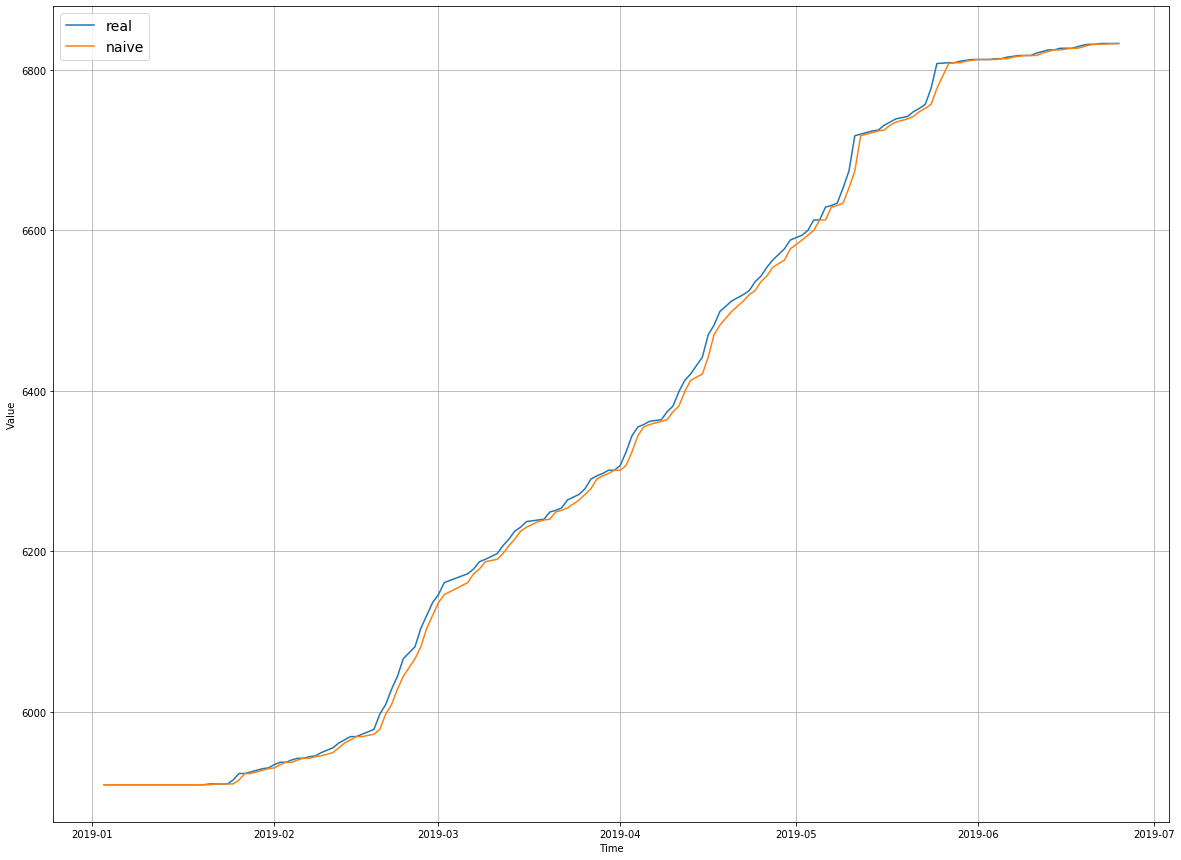

In [12]:
plt.figure(figsize=(20,15))
baseline_tools.plot_series(real.index, real, label="real")
baseline_tools.plot_series(real.index, naive, label="naive")
plt.show()

In [13]:
naive

2019-01-03    5909.0
2019-01-04    5909.0
2019-01-05    5909.0
2019-01-06    5909.0
2019-01-07    5909.0
               ...  
2019-06-19    6829.0
2019-06-20    6831.0
2019-06-21    6832.0
2019-06-22    6832.0
2019-06-25    6833.0
Name: VENTILADOR VF40 SILENCE FORCE CD RE, Length: 153, dtype: float64

In [14]:
real

2019-01-03    5909.0
2019-01-04    5909.0
2019-01-05    5909.0
2019-01-06    5909.0
2019-01-07    5909.0
               ...  
2019-06-19    6831.0
2019-06-20    6832.0
2019-06-21    6832.0
2019-06-22    6833.0
2019-06-25    6833.0
Name: VENTILADOR VF40 SILENCE FORCE CD RE, Length: 153, dtype: float64

In [15]:
real_reversed = reverse_cumsum(real, initial=train[-1]).values

In [16]:
naive_reversed = reverse_cumsum(naive, initial=test[0]).values

In [17]:
mean_absolute_error(real_reversed, naive_reversed).numpy()

3.895424836601307

In [18]:
mean_squared_error(real_reversed, naive_reversed).numpy()

45.64705882352941

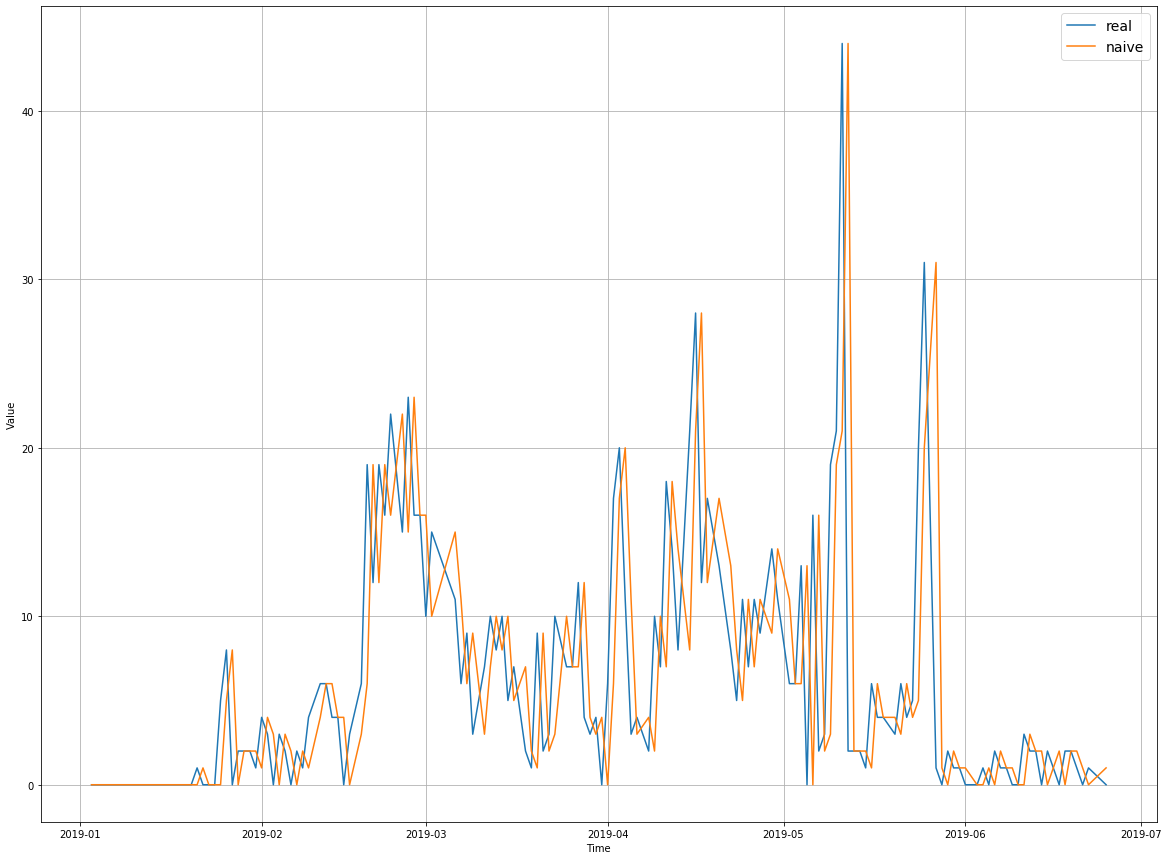

In [19]:
plt.figure(figsize=(20,15))
baseline_tools.plot_series(real.index, real_reversed, label="real")
baseline_tools.plot_series(real.index, naive_reversed, label="naive")
plt.show()

* Of course it gives us the same answer as doing it without cumulative sum hahaha

### Prophet

In [22]:
train.tail()

2018-12-27    5907.0
2018-12-28    5907.0
2018-12-29    5909.0
2018-12-30    5909.0
2018-12-31    5909.0
Name: VENTILADOR VF40 SILENCE FORCE CD RE, dtype: float64

In [23]:
test.tail()

2019-06-19    6831.0
2019-06-20    6832.0
2019-06-21    6832.0
2019-06-22    6833.0
2019-06-25    6833.0
Name: VENTILADOR VF40 SILENCE FORCE CD RE, dtype: float64

In [24]:
train = train.reset_index()

In [26]:
train.columns = ["ds", "y"]

In [27]:
m = Prophet()
m.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [30]:
test.shape[0]

154

In [62]:
idx = pd.date_range("2019-01-02", "2019-06-25")

In [63]:
test = test.reindex(idx, fill_value="bfill")

In [64]:
test.shape[0]

175

In [66]:
future = m.make_future_dataframe(periods=test.shape[0] + 1)

In [67]:
future.tail()

,ds
1421,2019-06-21
1422,2019-06-22
1423,2019-06-23
1424,2019-06-24
1425,2019-06-25


In [68]:
forecast_result = m.predict(future)

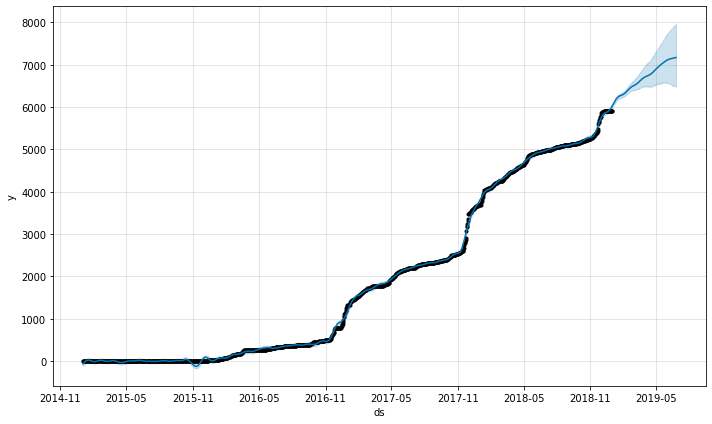

In [69]:
fig1 = m.plot(forecast_result)

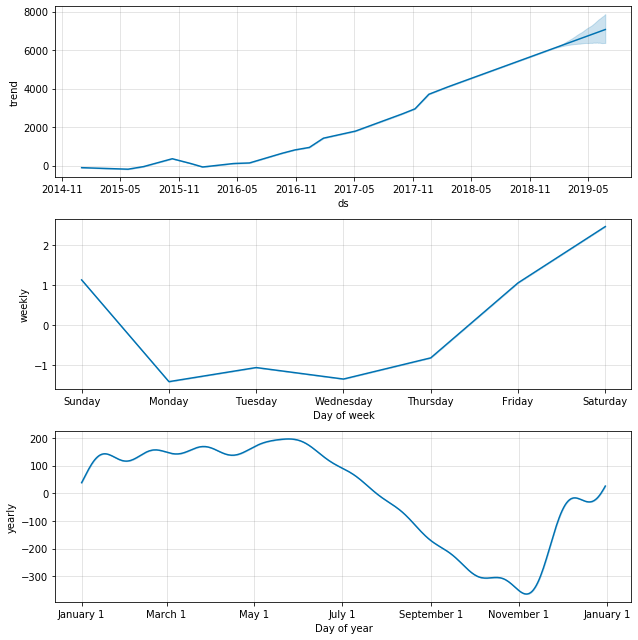

In [70]:
fig2 = m.plot_components(forecast_result)

In [103]:
forecast_result.loc[1245:1255]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1245,2018-12-27,5974.349071,5914.871695,6014.002862,5974.349071,5974.349071,-9.968912,-9.968912,-9.968912,-0.821410,-0.821410,-0.821410,-9.147502,-9.147502,-9.147502,0.0,0.0,0.0,5964.380159
1246,2018-12-28,5980.410339,5933.560566,6027.929180,5980.410339,5980.410339,-1.054454,-1.054454,-1.054454,1.056105,1.056105,1.056105,-2.110559,-2.110559,-2.110559,0.0,0.0,0.0,5979.355886
1247,2018-12-29,5986.471608,5945.448427,6040.736442,5986.471608,5986.471608,8.218870,8.218870,8.218870,2.466844,2.466844,2.466844,5.752026,5.752026,5.752026,0.0,0.0,0.0,5994.690479
1248,2018-12-30,5992.532877,5960.024142,6054.348696,5992.532877,5992.532877,15.469049,15.469049,15.469049,1.131152,1.131152,1.131152,14.337897,14.337897,14.337897,0.0,0.0,0.0,6008.001927
1249,2018-12-31,5998.594146,5970.236566,6065.895207,5998.594146,5998.594146,22.110269,22.110269,22.110269,-1.416836,-1.416836,-1.416836,23.527105,23.527105,23.527105,0.0,0.0,0.0,6020.704415
1250,2019-01-01,6004.655415,5992.433465,6084.093563,6004.655415,6004.655415,32.121361,32.121361,32.121361,-1.064006,-1.064006,-1.064006,33.185367,33.185367,33.185367,0.0,0.0,0.0,6036.776775
1251,2019-01-02,6010.716684,6007.046208,6104.899071,6010.716684,6010.716684,41.815787,41.815787,41.815787,-1.351850,-1.351850,-1.351850,43.167636,43.167636,43.167636,0.0,0.0,0.0,6052.532471
1252,2019-01-03,6016.777953,6019.232943,6118.954129,6016.777953,6016.777953,52.500462,52.500462,52.500462,-0.821410,-0.821410,-0.821410,53.321872,53.321872,53.321872,0.0,0.0,0.0,6069.278415
1253,2019-01-04,6022.839221,6037.207381,6137.639701,6022.839221,6022.839221,64.549027,64.549027,64.549027,1.056105,1.056105,1.056105,63.492921,63.492921,63.492921,0.0,0.0,0.0,6087.388248
1254,2019-01-05,6028.900490,6056.712094,6152.476725,6028.900490,6028.900490,75.993256,75.993256,75.993256,2.466844,2.466844,2.466844,73.526412,73.526412,73.526412,0.0,0.0,0.0,6104.893747


In [71]:
prediction = forecast_result[["ds", "yhat"]]

In [72]:
prediction.index = pd.to_datetime(prediction.ds)

In [73]:
prediction.drop(columns=["ds"], inplace=True)

/home/itamar/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [74]:
prediction = prediction.loc[prediction.index.year == 2019]

In [75]:
prediction

,yhat
ds,
2019-01-01,6036.776775
2019-01-02,6052.532471
2019-01-03,6069.278415
2019-01-04,6087.388248
2019-01-05,6104.893747
...,...
2019-06-21,7165.253634
2019-06-22,7169.055714
2019-06-23,7170.261098


In [79]:
test.dropna(inplace=True)

In [80]:
test

2019-01-02    5909.0
2019-01-03    5909.0
2019-01-04    5909.0
2019-01-05    5909.0
2019-01-06    5909.0
               ...  
2019-06-19    6831.0
2019-06-20    6832.0
2019-06-21    6832.0
2019-06-22    6833.0
2019-06-25    6833.0
Name: VENTILADOR VF40 SILENCE FORCE CD RE, Length: 154, dtype: float64

In [81]:
prediction = prediction.loc[test.index]

In [97]:
prediction

,yhat
2019-01-02,6052.532471
2019-01-03,6069.278415
2019-01-04,6087.388248
2019-01-05,6104.893747
2019-01-06,6119.365466
...,...
2019-06-19,7158.473082
2019-06-20,7161.126092
2019-06-21,7165.253634
2019-06-22,7169.055714


In [94]:
test_reversed = reverse_cumsum(test, initial=train["y"][-1:])

In [108]:
prediction_reversed = reverse_cumsum(prediction["yhat"], initial=forecast_result.loc[1250]["yhat"])

In [109]:
test_reversed

2019-01-02    0.0
2019-01-03    0.0
2019-01-04    0.0
2019-01-05    0.0
2019-01-06    0.0
             ... 
2019-06-19    2.0
2019-06-20    1.0
2019-06-21    0.0
2019-06-22    1.0
2019-06-25    0.0
Name: VENTILADOR VF40 SILENCE FORCE CD RE, Length: 154, dtype: float64

In [110]:
prediction_reversed

2019-01-02    15.755695
2019-01-03    16.745944
2019-01-04    18.109833
2019-01-05    17.505498
2019-01-06    14.471720
                ...    
2019-06-19     1.726232
2019-06-20     2.653010
2019-06-21     4.127542
2019-06-22     3.802080
2019-06-25     4.547259
Name: yhat, Length: 154, dtype: float64

In [111]:
mean_absolute_error(test_reversed, prediction_reversed).numpy()

6.158695707434145

In [112]:
mean_squared_error(test_reversed, prediction_reversed).numpy()

66.58591878422189

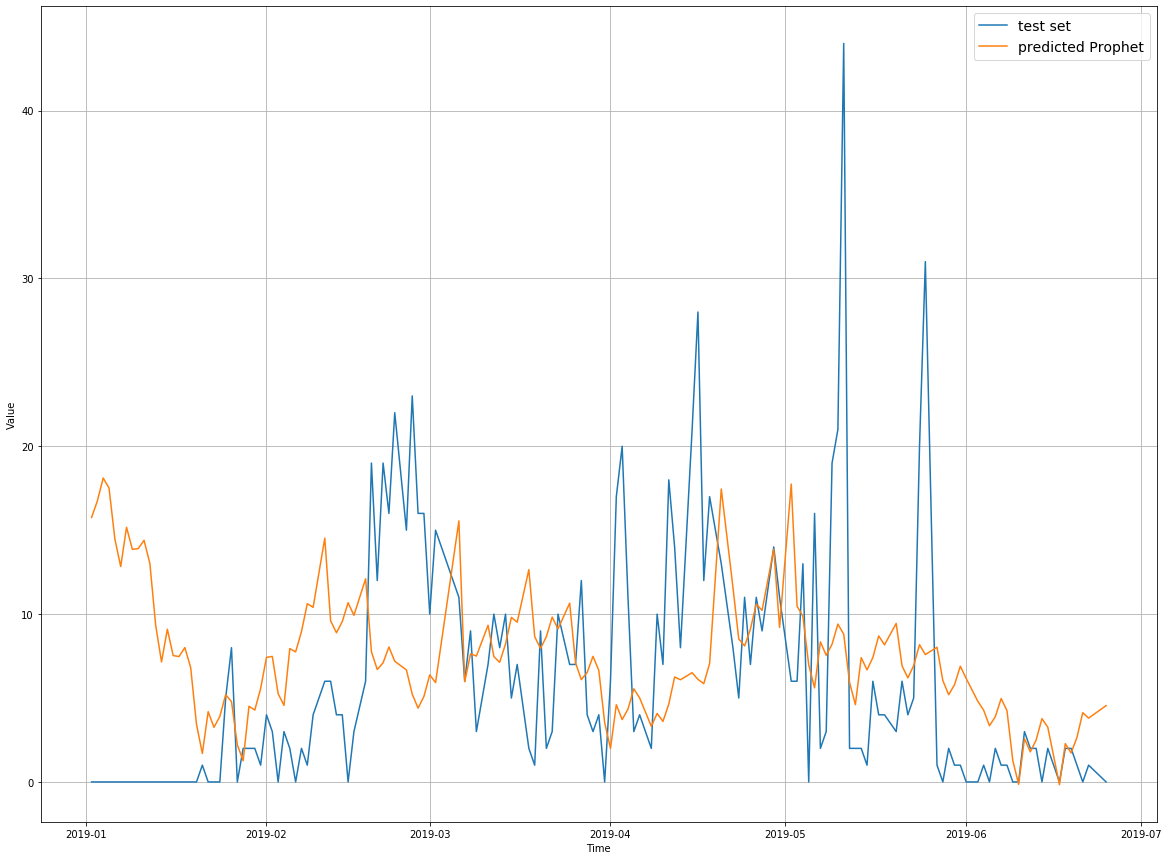

In [114]:
plt.figure(figsize=(20,15))
baseline_tools.plot_series(test_reversed.index, test_reversed, label="test set")
baseline_tools.plot_series(test_reversed.index, prediction_reversed, label="predicted Prophet")
plt.show()